In [1]:
# 1. Pick a dataset to work with. 
# 2. Clone / download the dataset
# 3. Undesrand and describe what the dataset does and what is the goal which is necessary to accomplish
# 4. Divide the data to the training and testing set. 
#    At start lets start with istribution 60-40%. This ratio should be tweaked with to find and optimal solution
# 5. Pick right activation function and test which one is the most suitable for the problem in hand
# 6. Do a proper visualization od the data we gathered while whole process:
# 6a. Error
# 6b. Accuracy
# 6c. Weights (? - Depends on the neural network and it complexity)
# 6d. Struncture of the network (either visual or the Keras print visualization of the neural network thru "description")

## 1. Ziskavanie dát 

In [2]:
# importing keras library to work with the Neural Networks design
import keras
# importing padnas to work with files / csv-s containing the datasets
import pandas as pd
# importing numpy lib for faster manipulation with data supporting math 
import numpy as np

# lets prepare both of them and  later we will see which one is better for visualization of the data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing the lib to help to split testing and training data which will be later used
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.preprocessing

from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout
from keras.layers.embeddings import Embedding

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
# nainportovanie z kniznice sklearn MaxAbsScaler, ktory transformuje prvky skalovanim jednotlivych prvkov na dany rozsah 
from sklearn.preprocessing import MaxAbsScaler

from sklearn.linear_model import LogisticRegression
from keras.utils import np_utils 
from keras.utils import to_categorical

# nainportovanie z kniznice keras Sequential, ktory sa pouziva na vytvorenie modelu ucenia pri ktorom sa vytvaraju instancie
# triedy Sequential a pridavaju/vytvaraju sa do nej vrstvy modelu
from keras.models import Sequential 
# nainportovanie z kniznice keras Dense
#pomocou Dense su definovane plne spojene vrstvy, kde ako prvy argument sa zadava pocet neuronov alebo uzlov vo vrstve a pomocou
# aktivacneho argumentu urcit aktivacnu funkciu
from keras.layers import Dense 
import tensorflow as tf
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Predpriprava dat:
### pokracovanie s vybranym datasetom Cluster2_new_file_city_vs_incidents.csv

In [3]:
# načítanie datasetu do dataframe z cvs file
# povodný súbor pochádza z https://www.kaggle.com/murderaccountability/homicide-reports
# a obsahuje správy o vraždách za roky 1990 - 2014 z rôznych štátov USA
# pre lepsie pracovanie s datami a moznosti uploadovania na github sa velkost datasetu znizila o 10 rokov
file = pd.read_csv("Cluster2_new_file_city_vs_incidents.csv")
                                             

In [4]:
# zobrazte prvých 5 riadkov pre rýchly náhľad ako dáta vyzerajú
file.head()

,Unnamed: 0,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship
0,0,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance
1,1,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance
2,2,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown
3,3,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance
4,4,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown


### Vlastnosti datasetu
<ol>
    <li>Crime Solved: Klasifikuje, či bol zločiť vyrierený. Bud 'Yes' == 'Áno' alebo 'No' == 'Nie' </li>
    <li>Victim Sex: Klasifikácia pohlavia obete. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c.'Unknown' == 'Neidentifikované' </li>
    <li>Victim Age: Vek obete. </li>
    <li>Victim Race: Krasifikácia posla rasy obete. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Victim Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic'  </li>
    <li>Perpetrator Sex: Klasifikácia pohlavia páchteľa. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c. 'Unknown' == 'Neidentifikované' </li>
    <li>Perpetrator Age:  Vek páchateľa. Ak vek páchateľa je neznámy, záznam obsahuje nulu. </li>
    <li>Perpetrator Race: Krasifikácia posla rasy páchateľa. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Perpetrator Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic' </li>
    <li>Relationship: Klasifikikácia vsťahu medzi obeťou a páchateľom. 28 rôznych kategórií. </li>
   
</ol>

In [5]:
# tvar DataFrame (riadky, stĺpce)
# porozumieť množstvu dát, s ktorými pracujeme
# môžeme vidieť, že náš datasetmá tvar matice obsahujú 638 454 riadkov a 24 stlpcov
file.shape

(628198, 11)

In [6]:
# popis dát
# dôležitou informáciou je, že náš dataset je kompletný, tj neosasuje nenulove hodnoty 
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628198 entries, 0 to 628197
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             628198 non-null  int64  
 1   Crime Solved           628198 non-null  object 
 2   Victim Sex             628198 non-null  object 
 3   Victim Age             628198 non-null  int64  
 4   Victim Race            628198 non-null  object 
 5   Victim Ethnicity       628198 non-null  object 
 6   Perpetrator Sex        628198 non-null  object 
 7   Perpetrator Age        628198 non-null  float64
 8   Perpetrator Race       628198 non-null  object 
 9   Perpetrator Ethnicity  628198 non-null  object 
 10  Relationship           628198 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 52.7+ MB


In [7]:
# skontrolujte, či existujú nulové hodnoty
file.isna().sum()

Unnamed: 0               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
dtype: int64

In [8]:
# odstranymi prebitocny stlpek, ktory sa nam vytvoril pri preinxdexovani
file = file.drop(labels='Unnamed: 0', axis=1)
# pre lepsiu pracu si premenime typ stlpcov z object na categorical


In [9]:
file.columns

Index(['Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race',
       'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age',
       'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship'],
      dtype='object')

In [10]:
file['Relationship'].value_counts()

Unknown                 266198
Acquaintance            124913
Stranger                 95647
Wife                     23051
Friend                   21779
Girlfriend               16364
Son                       9637
Family                    9426
Husband                   8750
Daughter                  7299
Boyfriend                 7263
Neighbor                  6247
Brother                   5481
Father                    4330
Mother                    4218
In-Law                    3606
Common-Law Wife           2451
Ex-Wife                   1954
Common-Law Husband        1939
Boyfriend/Girlfriend      1373
Stepfather                1355
Sister                    1288
Stepson                   1165
Stepdaughter               747
Ex-Husband                 623
Employer                   506
Employee                   378
Stepmother                 210
Name: Relationship, dtype: int64

In [11]:
# pre lepsiu pracu si premenime typ stlpcov z object na categorical

file['Victim Sex'] = file['Victim Sex'].astype('category')
file['Victim Race'] = file['Victim Race'].astype('category')
file['Victim Ethnicity'] = file['Victim Ethnicity'].astype('category')
file['Perpetrator Sex'] = file['Perpetrator Sex'].astype('category')
file['Perpetrator Ethnicity'] = file['Perpetrator Ethnicity'].astype('category')
file['Relationship'] = file['Relationship'].astype('category')

file['Crime Solved'] = file['Crime Solved'].astype('category')

In [12]:
file = file.drop(labels=['Victim Ethnicity', 'Perpetrator Ethnicity'], axis =1)

In [13]:
# nainportovanie z kniznice keras np_utils a to_categorical
# prepis do kategorickej premennej, prevedie cele cisla na binarnu maticu
from keras.utils import np_utils 
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder


In [14]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder(sparse=False)

In [15]:
predictor = file.drop(labels = 'Crime Solved', axis = 1)
#ako premennú, ktorú označujeme za cieľovú a teda chceme vedieť ci sa vyriesi pripad alebo nevyriesi
target = file['Crime Solved']


In [16]:
# kedze pracujeme s kategorickymi premennymi pre lepsie vysledky pouzijeme OneHotEncoder, 
# ktory nam vytvori dummy triedy a zabezpeci, ze vahy budu prerozdelene "spravodlivo"
# keby bol pouzity iba LabelEncoder, pocitat bude prat hodnoty ako mensie alebo vacsie
# https://www.youtube.com/watch?v=irHhDMbw3xo
column_transform = make_column_transformer((OneHotEncoder(), ['Victim Sex', 'Victim Race', 'Perpetrator Sex',
       'Perpetrator Race', 'Relationship']), remainder='passthrough')
# ohe = OneHotEncoder(categories=[list(data_working_with.drop(labels=['Crime Solved','Agency Name', 'City', 'State'], axis='columns').select_dtypes(include=['object']).columns)])
predictor = column_transform.fit_transform(predictor)

In [17]:
target = label_encoder.fit_transform(target)
# podstate ten isty job ako sklearn OneHotEncoder
# target = np_utils.to_categorical(target)

In [18]:
target

array([1, 1, 0, ..., 1, 1, 1])

In [19]:
# premenných, na ktoré rozdelíme celý náš súbor údajov
# rozdelíme ich pomocou train_test_split, ktorý rozdelí údaje podľa požadovanej veľkosti na školenie a testovanie,
# v našom prípade 3: 7, takže 30% bude v testovacej sade a 70% v tréningovej sade
# random_state zabezpečí, že údaje sa nebudú zdieľať rovnomerne pri viacerých spusteniach
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.3, random_state = 56)
#vypíšeme si ako sú tvarované premenné, čísla reprezentujú (záznamy, triedy) resp. (riadky, stĺpce)
print(X_train.shape)
print(X_test.shape)

print(X_train[0])
print(X_train[1])

(439738, 46)
(188460, 46)
  (0, 1)	1.0
  (0, 7)	1.0
  (0, 9)	1.0
  (0, 15)	1.0
  (0, 42)	1.0
  (0, 44)	20.0
  (0, 1)	1.0
  (0, 4)	1.0
  (0, 9)	1.0
  (0, 12)	1.0
  (0, 16)	1.0
  (0, 44)	30.0
  (0, 45)	26.0


In [20]:
# # Normalizacia cisel
# # normalizacia sa robi hlavne ked sa hodnoty v datasete velmi lisia, ako v nasom pripade, mame hodnoty napr. 
# #  Potebujeme pouzit Skalovaciu  metriku ktora vie spracovavat sparse data, ktore nam OneHotEncoder pripravil

# scaler = MaxAbsScaler()
# #fit_transform používame na trénovacie množiny aby sme škálovali trénovacie dáta a naučili sa škláovacie parametre pre dáta
# #tieto naučené parametre sa následne využijú na škálovanie testovacích dát
# #metóda fit vypočíta priemernú hodnotu a rozptyl dát. transform následne prepočítava dáta podľa priemeru a rozptylu
# X_train = scaler.fit_transform(X_train) # normalizacia cisel v premennej X_train
# X_test = scaler.fit_transform(X_test) # normalizacia cisel v premennej X_test
# # y_train = scaler.fit_transform(y_train) # normalizacia cisel v premennej y_train
# # y_test = scaler.fit_transform(y_test) # normalizacia cisel v premennej y_test

# # ukazka vysledku normalizacie cisel
# print(X_train[0]) # ukazka nulteho riadku v premennej X_train

# # print(type(X_train))
# # print(type(X_test))
# # print(type(y_train ))
# # print(type(y_test))

### Konštrukcia modelu
<ul>
    <li> Špecifikácia vstupného tvaru </li>
 </ul>
 
###  Kompilácia modelu
Pred trénovaním modelu je potreba konfigurovat učiaci sa proces, pomocou kompilačnej metódy. K tomu budeme potrebovať.
<ul>
    <li> Optimizér <ul>
    <li> Loss function </li>
    <li> Zoznam metrík V prípade kategorického modelu ako nášho je accuracy (presnosť) </li>
    <li> </li>
</ul>


In [21]:
#  podla tvaru X train zistime ako bude vyzerat vstupna vrstva, respektive kolko fearures mame
# vidime, ze mame treningovu  maticu o dlyke 439,738 s 53 roznymi features

X_train.todense()
X_test.todense()

matrix([[ 0.,  1.,  0., ...,  0., 21., 51.],
        [ 0.,  1.,  0., ...,  0., 27.,  0.],
        [ 0.,  1.,  0., ...,  0., 30.,  0.],
        ...,
        [ 0.,  1.,  0., ...,  0., 20., 21.],
        [ 0.,  1.,  0., ...,  0., 48.,  0.],
        [ 0.,  1.,  0., ...,  0., 19.,  0.]])

In [22]:
# https://glassboxmedicine.com/2019/01/17/introduction-to-neural-networks/
# https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

# Pridanie zvoleneho modelu
# Dense - vykonáva operáciu outuput = activation(dot(input, kernel)+bias), jedná sa o model plne zapojeného layeru/vrstvy
# prvé číslo alebo units je počet neurónov ktoré sa v danej vrstve používa

# Kategorické: Predpovedanie viacerých štítkov z viacerých tried
# Napr. predpovedanie prítomnosti zvierat na obrázku
# Výsledná vrstva neurónovej siete bude mať jeden neurón pre každú z tried a budú vracať hodnotu medzi 0 a 1, ktorú možno odvodiť ako pravdepodobnú.
# Aby sme pochopili presnosť predikcie, porovnáva sa každý výstup s jeho zodpovedajúcou skutočnou
# hodnotou. Ak sa v stĺpci so skutočnou hodnotou zobrazí 1, v údajoch sa nachádza kategória,
# ktorej zodpovedá, inak sa zobrazí 0.
# https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

# pre tento pripad je vhodna finalna aktivacna funkcia Sigmoin a loss funkcia Binary Cross Entropy

# https://keras.io/api/layers/activations/
# https://www.youtube.com/watch?v=bqBRET7tbiQ&t=996s
# Odporucanie 1-3 hidden layers, zvycajne 2
# pocet neuronov by mal byt medzi poctom input layer a output layers

model = Sequential([
    Dense(53, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(53, activation='relu'),
    Dense(25, activation='sigmoid'),
    Dense(1)
])

# zhrnutie modelu keras
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 53)                2491      
_________________________________________________________________
dense_1 (Dense)              (None, 53)                2862      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1350      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 6,729
Trainable params: 6,729
Non-trainable params: 0
_________________________________________________________________


In [23]:
# https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

# pre tento pripad je vhodna finalna aktivacna funkcia Sigmoin a loss funkcia Binary Cross Entropy
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50, batch_size = 4332)
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

Epoch 1/50
102/102 [==============================] - 8s 60ms/step - loss: 8.4106e-08 - accuracy: 0.2945 - val_loss: 8.4027e-08 - val_accuracy: 0.2951
Epoch 2/50
102/102 [==============================] - 5s 41ms/step - loss: 8.4074e-08 - accuracy: 0.2947 - val_loss: 8.4027e-08 - val_accuracy: 0.2951
Epoch 3/50
102/102 [==============================] - 5s 41ms/step - loss: 8.4356e-08 - accuracy: 0.2924 - val_loss: 8.4027e-08 - val_accuracy: 0.2951
Epoch 4/50
102/102 [==============================] - 5s 40ms/step - loss: 8.4262e-08 - accuracy: 0.2932 - val_loss: 8.4027e-08 - val_accuracy: 0.2951
Epoch 5/50
102/102 [==============================] - 5s 40ms/step - loss: 8.4169e-08 - accuracy: 0.2939 - val_loss: 8.4027e-08 - val_accuracy: 0.2951
Epoch 6/50
102/102 [==============================] - 5s 41ms/step - loss: 8.4208e-08 - accuracy: 0.2936 - val_loss: 8.4027e-08 - val_accuracy: 0.2951
Epoch 7/50
102/102 [==============================] - 5s 41ms/step - loss: 8.4168e-08 - accura

In [24]:
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

5890/5890 [==============================] - 16s 3ms/step - loss: 8.4027e-08 - accuracy: 0.2951
Presnost modelu je:  29.51 %
Pri strate:  0.0 %


## 6. Evaluacia modelu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


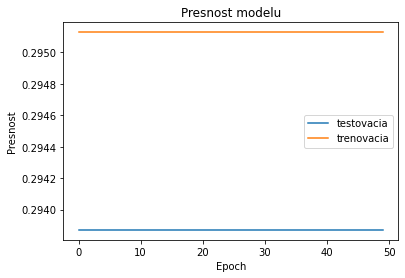

In [25]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys())
# Graf zobrazujuci presnost modelu
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Presnost modelu')
plt.ylabel('Presnost')
plt.xlabel('Epoch')
plt.legend(['testovacia', 'trenovacia'])
plt.show()

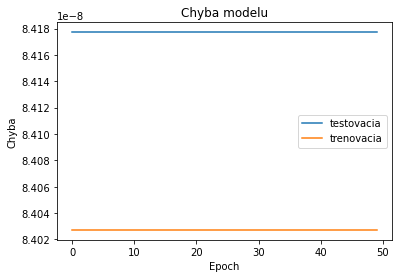

In [26]:
# Graf zobrazujuci chybovost modelu
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Chyba modelu')
plt.ylabel('Chyba')
plt.xlabel('Epoch')
plt.legend(['testovacia', 'trenovacia'])
plt.show()